# 107-1 全民國防LINE群組分析
---

## 目的
- 讓大家更了解國防課生態
- 讓大家更了解各系所參與國防課的習慣
- 讓大家學習基本資料分析手段
---

## 方法與步驟
1. 資料前處理
    1. [用open讀取.txt檔案](#用open讀取.txt檔案)
    2. [行尾特殊字元去除](#行尾特殊字元去除)
    3. [合併至日期](#合併至日期)
    4. [合併至發言人](#合併至發言人)
2. 統計特定字詞出現次數
    1. [函式設計](#函式設計)
    2. [計算統計結果](#計算統計結果)
3. 繪製圖表
    1. [長條圖Bar](#長條圖Bar)
    2. [圓餅圖Pie](#圓餅圖Pie)

### 這邊先輸入讓頁面不會太長的CSS...

In [2]:
%%html
<style>
.nbviewer div.output_area {
  overflow-y: auto;
  max-height: 300px; /* or value of your choosing */
}
</style>

### 用open讀取.txt檔案
---
#### 記得確認編碼是 Big5 還是 UTF8 !!!
基本上Windows的中文文字是以Big5編碼，Mac則是UTF8；Windows的UTF8經常帶有BOM標頭，所以在`encoding`的部分要選用`"utf-8-sig"`而不是一般的`"utf-8"`

In [3]:
#讀取所有資料
import numpy as np
from pprint import pprint

with open('20190601_BAK.txt', encoding='utf-8-sig') as f:
    data_raw = f.read().splitlines()

pprint(data_raw)

['2019/03/18（一）',
 '17:12\t藍雍淵邀請Philip Wang加入',
 '17:12\tPhilip Wang加入群組',
 '17:50\t仲立邀請楊向擎加入',
 '17:51\t楊向擎加入群組',
 '18:41\t朱漢屏\t[檔案]',
 '18:48\t朱漢屏\t'
 '"受訓18週掛階晉升軍官，3月12日至4月9日止報名，起薪近五萬，做一年軍官後，可以選擇退伍，也可以繼續做就升中尉，一年一簽，不綁約，免月租。',
 '有興趣的同學請洽教官處。',
 '這次可能最後一次的一年期，以往都是五年期軍官為主。"',
 '',
 '2019/03/19（二）',
 '14:10\t顏世偉已收回訊息',
 '14:10\t顏世偉\t"【課程安排與報告注意事項】',
 '同學們，好:',
 '1.從下週起開始期中報告，每位組員皆要上台說話。',
 '2.之後每次上課，會教(復習)防身術，請同學務必出席，缺席者請於10:10前在line上請假，謝謝!"',
 '14:23\t朱漢屏\t全組到齊才能開始報告哦',
 '14:29\tHarry\t收到！',
 '16:24\tPhilip Wang\t豪',
 '16:25\t藍雍淵\t知悉',
 '',
 '2019/03/20（三）',
 '14:45\t李皓雲加入群組',
 '',
 '2019/03/21（四）',
 '14:18\t柏澐加入群組',
 '',
 '2019/03/24（日）',
 '21:07\t顏世偉\t"【3/25課程安排與報告】',
 '明日報告組別為:泰拳組(10:10準時報告)，接續由教官教導防身術(期末術科考試內容)，再來部隊的人員蒞臨分享，請同學務必出席並填寫座位表，謝謝!"',
 '21:38\t林典樺\t教官好 我是金融四林典樺   學號410480055，明天因爲要拍畢業個人照一整個早上，故請假一次，謝謝教官。',
 '21:54\t崇淵\t教官好，我是經濟三王崇淵，學號410573057，明天因為要參加大專盃網球比賽，故請假一次',
 '23:59\tEason\t教官好，我是經濟三陳恆猷，學號410573010，明天因為家中有事人在台中，故請假一次',
 '',
 '2019/03/25（一）',
 '00:48\t黃潔金 🍟\t教官好，明天泰拳組

### 行尾特殊字元去除
---
#### `.strip()`會跳脫字串尾端的特殊字元
(不論是Unix系統的LR還是Windows系列的CFLR)

In [4]:
#資料清理

#去除結尾特殊符號
data_org = [line.strip() for line in data_raw]

#去除系統訊息
delete_index_list = []
for i,v in enumerate(data_org):
    if "[檔案]" in v or ("邀請" in v and "加入" in v) or "加入群組" \
                in v or "退出群組" in v or "已收回訊息" in v:
        delete_index_list.append(i)
for index in sorted(delete_index_list, reverse=True):
    del data_org[index]
    
pprint(data_org)

['2019/03/18（一）',
 '18:48\t朱漢屏\t'
 '"受訓18週掛階晉升軍官，3月12日至4月9日止報名，起薪近五萬，做一年軍官後，可以選擇退伍，也可以繼續做就升中尉，一年一簽，不綁約，免月租。',
 '有興趣的同學請洽教官處。',
 '這次可能最後一次的一年期，以往都是五年期軍官為主。"',
 '',
 '2019/03/19（二）',
 '14:10\t顏世偉\t"【課程安排與報告注意事項】',
 '同學們，好:',
 '1.從下週起開始期中報告，每位組員皆要上台說話。',
 '2.之後每次上課，會教(復習)防身術，請同學務必出席，缺席者請於10:10前在line上請假，謝謝!"',
 '14:23\t朱漢屏\t全組到齊才能開始報告哦',
 '14:29\tHarry\t收到！',
 '16:24\tPhilip Wang\t豪',
 '16:25\t藍雍淵\t知悉',
 '',
 '2019/03/20（三）',
 '',
 '2019/03/21（四）',
 '',
 '2019/03/24（日）',
 '21:07\t顏世偉\t"【3/25課程安排與報告】',
 '明日報告組別為:泰拳組(10:10準時報告)，接續由教官教導防身術(期末術科考試內容)，再來部隊的人員蒞臨分享，請同學務必出席並填寫座位表，謝謝!"',
 '21:38\t林典樺\t教官好 我是金融四林典樺   學號410480055，明天因爲要拍畢業個人照一整個早上，故請假一次，謝謝教官。',
 '21:54\t崇淵\t教官好，我是經濟三王崇淵，學號410573057，明天因為要參加大專盃網球比賽，故請假一次',
 '23:59\tEason\t教官好，我是經濟三陳恆猷，學號410573010，明天因為家中有事人在台中，故請假一次',
 '',
 '2019/03/25（一）',
 '00:48\t黃潔金 🍟\t教官好，明天泰拳組周秉憲 教練會到場幫忙指導泰拳!',
 '03:00\t許家豪\t教官好，我是休運二 許家豪 學號410684062 因身體不適 故請假一次 謝謝教官',
 '03:20\t林屴洋\t教官好，我是林屴洋 學號410679056 因身體不適 故請假一次 謝謝教官',
 '08:14\t*琪霖\t教官好，我是會計二 張簡琪霖 學號410677088，因

 '20:43\t*琪霖\t教官好，我是會計二 張簡琪霖 學號410677088，因準備期中考試，故請假一次，謝謝教官！',
 '21:41\t崇恩\t教官好，我是會計二林崇恩 學號410677046，因準備期中考試，故請假一次，謝謝教官！',
 '21:49\t王碩佑\t教官好，我是財法三王碩佑 學號410571645，因準備期中考試，故請假一次，謝謝教官！',
 '22:42\t陳瑨\t教官好，我是行政四 陳瑨  學號410472062，因準備期中考故請假一次，謝謝教官！',
 '',
 '2019/04/29（一）',
 '04:24\tHarry\t教官好，我是資工四 袁浩 學號410485047，因頭痛不適請假一次，謝謝教官！',
 '05:25\t濟銘\t教官好，我是會計三 方濟銘 學號410577096，因感冒身體不適請假一次，謝謝教官。',
 '07:17\t吳奕權\t教官好，我是企管四 吳奕權學號410479082，因要準備期中報告，故請假一次，謝謝教官',
 '07:35\t林尚頤\t教官好，我是行政四林尚頤學號410481001，因準備期中考試，故請假一次，謝謝教官！',
 '08:00\t吳致遠\t教官好，我是經濟四 吳致遠學號410473011，因要準備期中報告，故請假一次，謝謝教官',
 '08:38\t陳宥宏\t教官好，我是法學三 陳宥宏 學號410571228，今天因身體不適想請假一次，謝謝教官!',
 '08:43\t李老師\t教官好，我是不動二 李威瑾學號410676069，今天因要面試實習 故請假一次，謝謝教官!',
 '08:45\t吳冠廷\t教官好，我是會計三吳冠廷學號410577077，今天身體不舒服要去看醫生 故請假一次，謝謝教官!',
 '08:58\t李家名^^\t教官好，我是會計三 李家名 學號410577038，今天因身體不適請假一次，謝謝教官。',
 '09:08\t王富慶\t教官好，我是會計三 王富慶學號410577040，今天因身體不適請假一次，謝謝教官。',
 '09:14\t曹子泓\t教官好 我是會計2 410677023曹子泓 今天因準備期中考 故請假一次 謝謝教官',
 '09:25\t鄭宇傑\t教官好，我是司法三 鄭宇傑 學號410571430，因身體不適，早上需看醫生，請假一次，謝謝教官。',


### 合併至日期
---
#### 使用 json 格式，絕對沒問題！
判斷某行文字屬於 **日期** 後，直接將該 **日期** 作為後方所有 **字串集合** 之 **鍵值**。  
得到下列格式之 json 資料：
```javascript
{
    //日期
    '2019/03/24（日）':[
        //當日所有發言
        '明天因爲要拍畢業個人照一整個早上，故請假一次，謝謝教官。',
        '明天因為要參加大專盃網球比賽，故請假一次',
        '明天因為家中有事人在台中，故請假一次',
        ...
    ],
    ...
}
```

In [5]:
#每日資料合成
data_daily_json = {}

today = ""
today_data = []
for i,v in enumerate(data_org):
    if len(v) == 13:
        if v[4] == '/' and v[7] == '/' and v[10] == '（' and v[12] == '）':
            if len(today_data) > 0:
                data_daily_json[today] = today_data
            today = v
            today_data = []
        else:
            today_data.append(v)
    elif v == "":
        pass
    else:
        today_data.append(v)
if len(today_data) > 0:
    data_daily_json[today] = today_data

pprint(data_daily_json)

{'2019/03/18（一）': ['18:48\t朱漢屏\t'
                   '"受訓18週掛階晉升軍官，3月12日至4月9日止報名，起薪近五萬，做一年軍官後，可以選擇退伍，也可以繼續做就升中尉，一年一簽，不綁約，免月租。',
                   '有興趣的同學請洽教官處。',
                   '這次可能最後一次的一年期，以往都是五年期軍官為主。"'],
 '2019/03/19（二）': ['14:10\t顏世偉\t"【課程安排與報告注意事項】',
                   '同學們，好:',
                   '1.從下週起開始期中報告，每位組員皆要上台說話。',
                   '2.之後每次上課，會教(復習)防身術，請同學務必出席，缺席者請於10:10前在line上請假，謝謝!"',
                   '14:23\t朱漢屏\t全組到齊才能開始報告哦',
                   '14:29\tHarry\t收到！',
                   '16:24\tPhilip Wang\t豪',
                   '16:25\t藍雍淵\t知悉'],
 '2019/03/24（日）': ['21:07\t顏世偉\t"【3/25課程安排與報告】',
                   '明日報告組別為:泰拳組(10:10準時報告)，接續由教官教導防身術(期末術科考試內容)，再來部隊的人員蒞臨分享，請同學務必出席並填寫座位表，謝謝!"',
                   '21:38\t林典樺\t教官好 我是金融四林典樺   '
                   '學號410480055，明天因爲要拍畢業個人照一整個早上，故請假一次，謝謝教官。',
                   '21:54\t崇淵\t教官好，我是經濟三王崇淵，學號410573057，明天因為要參加大專盃網球比賽，故請假一次',
                   '23:59\tEason\t教官好，我是經濟三陳恆猷，學號410573010，明天因為家中有事人在台中，故請假一次'],
 '

                   '21:44\t劉玹名\t教官好，我是法學四 劉玹名，學號410471228，因準備期中考，請假一次，謝謝教官！',
                   '21:45\t林典樺\t教官好，我是金融四 林典樺，學號410480055，需準備期中考，故請假一次，謝謝教官！',
                   '21:47\t浚燊\t"教官好 我是企管2A 莊浚燊',
                   '學號410679075 因明天下午有期中考 故請假一次 謝謝教官"',
                   '21:49\t鄭翃驛\t教官好，我是金融三 '
                   '鄭翃驛，學號410580017，因明天下午有期中考，故請假一次，謝謝教官！',
                   '22:14\t王昱憲\t教官好 我是經濟二 王昱憲 學號410673111 因明天下午有期中考 故請假一次 謝謝教官',
                   '22:22\t李明憲\t教官好，我是金融四 李明憲，學號410480035，因要準備期中考，故請假一次，謝謝教官',
                   '23:39\t李老師\t教官好，我是不動二 李威瑾學號410676069，因要準備期中考，故請假一次，謝謝教官',
                   '23:43\t朱漢屏\t"準備期中考的同學，請加油！',
                   '照顧小學妹妹的同學，辛苦了。',
                   '實習的同學，祝順利！',
                   '身體不適的同學，請多保重，早日康復。',
                   '陪同表弟面試的同學，請要多提醒各項細節，加油💪"'],
 '2019/04/22（一）': ['00:00\tHong 0\t教官好，我是應外二 蘇泓霖學號410682031，因要準備期中考，故請假一次，謝謝教官',
                   '00:00\tChun Sen\t教官好，我是應外二 '
                   '張淳森學號410682008，因要準備期中考，故請假一次，謝謝教官',
  

                   '03:38\t楊勁毅\t"電機四 楊勁毅',
                   '有好的防守才有好的攻擊的機會',
                   '而攻擊就能往最重要的點去打。"',
                   '08:47\tVictor 陳禹鑫\t"企管三 陳禹鑫',
                   '拳擊輸贏就在一瞬間，可能自己一開始都在挨打，但只要把握契機，就可以一拳致勝。在生活中我們可能常常遇到困境，但會有突破的剎那出現，準備好，就是自己的。"',
                   '09:22\t林彥斈\t會計三 林彥斈 '
                   '防守得好就會有絕佳的進攻機會，影片內一拳ko的選手幾乎都不急躁，等對手鬆懈防備後再給予致命一擊，有時候看似絕佳的機會也許就是暴露自己最大的弱點。',
                   '09:35\t黃潔金 🍟\t"資工二 黃潔金',
                   '許多一拳ko的選手，在剛開始會做好完善的防守，運用靈敏的步伐閃躲攻擊，並以銳利的觀察力，找尋攻擊的契機，而就在此時，對方自認為離勝利不遠，就忘記做好準備，自大的他失去危機感，露出了破綻，使得對手有機可趁，一拳將他ko出局。"',
                   '10:20\tKai\t"不動二 林子愷',
                   '拳擊是我夢寐以求的一種拳法，因為從小看影片到大，如今，可以看到同學在臺上做出如此擬真的動作，真是令我欽佩不己。"',
                   '10:51\t李宗高\t"不動二 李宗高',
                   '心得：這樣的技巧是要透過每天的努力訓練而來的，正所謂天才也是要靠99分的努力才行，所以希望有朝一日我也有機會深入學習泰拳或其他防身工具。"',
                   '10:55\t定峻吳\t"經濟二 吳定峻',
                   '像影片中的人物，練到這樣的境界，在於整個身體一氣呵成，招式不求多，在於一擊必勝，追求簡單的快狠準。"',
                   '11:10\tR\t"財政一 陳奕儒',
   

### 合併至發言人
---
#### 同樣使用 json 格式，絕對沒問題！
得到下列格式之 json 資料：
```javascript
{
    //日期
    '2019/03/25（一）':[
        //某一則發言
        {
            'timestamp': '09:18', //時間
            'name': 'Frank Kuo', //發言者
            'message': '因身體不適故請假一次 謝謝教官' //內容
        },
        ...
    ],
    ...
}
```

In [6]:
#個人發言合成
data_json = {}

for today in data_daily_json.keys():
    today_detail = data_daily_json[today]
    today_msg = []
    this_msg = {}
    for detail in today_detail:
        if len(detail) > 6:
            if detail[2] == ':' and detail[5] == '\t' \
                and detail[:2].isdigit() and detail[3:5].isdigit():
                if this_msg != {}:
                    today_msg.append(this_msg)
                _splitted_temp = detail.split('\t')
                this_time = _splitted_temp[0]
                this_name = _splitted_temp[1]
                this_txt = _splitted_temp[2]
                this_msg = {'timestamp':this_time, 'name':this_name, 'message':this_txt}
            else:
                this_msg['message'] += "\n"+detail
        elif detail == "":
            this_msg['message'] += "\n"
        else:
            this_msg['message'] += "\n"+detail
    if this_msg != {}:
        today_msg.append(this_msg)
        
    data_json[today] = today_msg

pprint(data_json)

{'2019/03/18（一）': [{'message': '"受訓18週掛階晉升軍官，3月12日至4月9日止報名，起薪近五萬，做一年軍官後，可以選擇退伍，也可以繼續做就升中尉，一年一簽，不綁約，免月租。\n'
                               '有興趣的同學請洽教官處。\n'
                               '這次可能最後一次的一年期，以往都是五年期軍官為主。"',
                    'name': '朱漢屏',
                    'timestamp': '18:48'}],
 '2019/03/19（二）': [{'message': '"【課程安排與報告注意事項】\n'
                               '同學們，好:\n'
                               '1.從下週起開始期中報告，每位組員皆要上台說話。\n'
                               '2.之後每次上課，會教(復習)防身術，請同學務必出席，缺席者請於10:10前在line上請假，謝謝!"',
                    'name': '顏世偉',
                    'timestamp': '14:10'},
                   {'message': '全組到齊才能開始報告哦',
                    'name': '朱漢屏',
                    'timestamp': '14:23'},
                   {'message': '收到！', 'name': 'Harry', 'timestamp': '14:29'},
                   {'message': '豪',
                    'name': 'Philip Wang',
                    'timestamp': '16:24'},
                   {'message': '知悉', 'name': '藍雍淵', 'timestamp': 

                   {'message': '"行政三 蔡瑞懋\n心得：保護好自己的頭 頭很重要 下面的龜裂的腳趾頭也很重要❤️"',
                    'name': 'Henry',
                    'timestamp': '18:01'},
                   {'message': '"法學三 黃郁翔\n心得：進攻可能會失常，但防守不會。（下輩子好想當黑人）"',
                    'name': '黃郁翔',
                    'timestamp': '18:02'},
                   {'message': '金融四 李明憲 '
                               '心得：拳擊運動在亞洲沒有非常盛行，也常常忽略其所帶來的傷害。拳擊運動員在頭部遭重擊後的症狀，在一開始出現腳步不穩、意識模糊、肌肉移動緩慢等，長期累積下來，會出現腦部受損症狀，如帕金森氏症等。故從事拳擊抑或是其他運動時都要提前做好防護措施，避免留下遺憾，',
                    'name': '李明憲',
                    'timestamp': '18:03'},
                   {'message': '"會計三 林弘杰\n保持侵略性，等待時機，勝利就在咫尺間"',
                    'name': '林弘杰',
                    'timestamp': '18:04'},
                   {'message': '社工二 王昱翔 很真實 很硬 不演',
                    'name': 'Thëo Wang',
                    'timestamp': '18:05'},
                   {'message': '"行政一 陳庠綸\n'
                               '心得：拳擊在臺灣普通民眾的生活中似乎沒有很熱絡，但卻聽聞在外籍勞工的社群中確實非常受歡迎的；我認為這是一個機會開創

                   {'message': '@崇恩 請多喝水',
                    'name': '朱漢屏',
                    'timestamp': '22:50'}],
 '2019/05/13（一）': [{'message': '教官好，我是會計三吳冠廷學號410577077 '
                               '因為返家過母親節，買不到週日車票，故請假一次，謝謝教官',
                    'name': '吳冠廷',
                    'timestamp': '01:28'},
                   {'message': '教官好，我是經濟三梁觀燁學號410573079 '
                               '因要為其他科(快要完蛋)大考做準備，故請假一次，謝謝教官',
                    'name': 'cirE',
                    'timestamp': '01:33'},
                   {'message': '教官好，我是司法三許博閎學號410571423因為返家過母親節，買不到週一車票，故請假一次，謝謝教官',
                    'name': 'Bohung',
                    'timestamp': '01:37'},
                   {'message': '"教官好，我是統計四藍雍淵，學號410472066\n'
                               '因為早上要和組員討論校外的大數據競賽，所以請假一次，謝謝教官"',
                    'name': '藍雍淵',
                    'timestamp': '01:45'},
                   {'message': '教官好，我是會計三周子豪。學號410577005 因腳受傷，故請假一次，謝謝教官',
                    'name': '豪',
 

### 函式設計
---
#### `def`後方為函式名稱 (可任意命名)，return 為返回值。 
ex. 數學中的 $f(x) = x + 2$ ，即對應到Python中的：
```python
def f(x):
    return x + 2
```

In [7]:
#常數
TOTAL_STUDENTS = 194 - 2 #去掉助教與教官
TOTAL_CLASSES = 10 - 3 #3/19~5/31共上7堂課，但4/1國定假日、4/8補假、4/15期中放假

# 設定一堆爛理由
def is_leave_msg(txt):
    if "無法出席" in txt or "請假" in txt or "看醫生" in txt or "會遲到" in txt:
        return True
    else:
        return False

### 計算統計結果
---
#### 下方是各種統計結果。

In [8]:
#統計總請假次數
leave_cnt = 0
for date in data_json:
    for msg in data_json[date]:
        if is_leave_msg(msg['message']):
            leave_cnt += 1

print('群組學生總數: %d'%TOTAL_STUDENTS)
print('觀測期間總上課次數: %d'%TOTAL_CLASSES)
print("總請假次數: %d"%leave_cnt)
print("平均每堂課請假人數: %.2f"%(leave_cnt/TOTAL_CLASSES))

群組學生總數: 192
觀測期間總上課次數: 7
總請假次數: 389
平均每堂課請假人數: 55.57


### 長條圖Bar
---
#### 使用 ` matplotlib` 套件作為視覺化工具
中文字體設定參考連結：https://medium.com/marketingdatascience/%E8%A7%A3%E6%B1%BApython-3-matplotlib%E8%88%87seaborn%E8%A6%96%E8%A6%BA%E5%8C%96%E5%A5%97%E4%BB%B6%E4%B8%AD%E6%96%87%E9%A1%AF%E7%A4%BA%E5%95%8F%E9%A1%8C-f7b3773a889b

03月 總請假次數: 54
	(平均每堂課請假次數: 54.00)
04月 總請假次數: 154
	(平均每堂課請假次數: 77.00)
05月 總請假次數: 181
	(平均每堂課請假次數: 45.25)
-
~沒有考慮各成員加入群組時間點，包含觀察者本人~


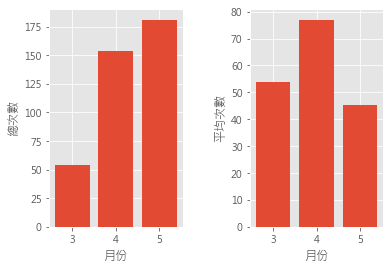

In [9]:
#每月請假次數
import matplotlib.pyplot as plt
plt.style.use('ggplot') #我喜歡R的ggplot2套件的樣式，所以設定成該樣式
#讓圖形直接繪製出來，不另外跳視窗
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] #使用微軟正黑體作為圖片中文字體
plt.rcParams['axes.unicode_minus'] = False

#上課次數: 3月-1, 4月-2, 5月-4
n_class = {3:1, 4:2, 5:4}

leave_cnt = {}
for date in data_json:
    this_month = int(date.split('/')[1])
    if this_month not in leave_cnt:
        leave_cnt[this_month] = 0
    for msg in data_json[date]:
        if is_leave_msg(msg['message']):
            leave_cnt[this_month] += 1

plt.subplot(1, 2, 1)
plt.bar(x=list(leave_cnt.keys()), height=list(leave_cnt.values()))
plt.xticks(list(leave_cnt.keys()))
plt.xlabel("月份")
plt.ylabel("總次數")

plt.subplot(1, 2, 2)
plt.bar(x=list(leave_cnt.keys()), height=[ a/b for a,b in zip(leave_cnt.values(),n_class.values()) ])
plt.xticks(list(leave_cnt.keys()))
plt.xlabel("月份")
plt.ylabel("平均次數")
plt.subplots_adjust(wspace = 0.5)

for m in leave_cnt:
    print("%02d月 總請假次數: %d"%(m, leave_cnt[m]))
    print("\t(平均每堂課請假次數: %.2f)"%(leave_cnt[m]/n_class[m]))
print("-\n~沒有考慮各成員加入群組時間點，包含觀察者本人~")

In [10]:
#印出請假排名
leaver = {}
for date in data_json:
    for msg in data_json[date]:
        if is_leave_msg(msg['message']):
            if msg['name'] not in leaver:
                leaver[msg['name']] = 0
            leaver[msg['name']] += 1

sorted_leaver = sorted(leaver.items(), key=lambda kv: kv[1], reverse=True)            

for i,v in enumerate(sorted_leaver[:10]): #印出請假前十名
    print("#{:>2} - {}次：{} .......缺課率: {:.2f}%".format(i+1,v[1],v[0],v[1]*100/TOTAL_CLASSES), end='')
    if i==0:
        print(' 👑')
    else:
        print()
print("...")

# 1 - 7次：Kai .......缺課率: 100.00% 👑
# 2 - 6次：*琪霖 .......缺課率: 85.71%
# 3 - 6次：李老師 .......缺課率: 85.71%
# 4 - 6次：樓宥成 .......缺課率: 85.71%
# 5 - 6次：賴欣揚 .......缺課率: 85.71%
# 6 - 6次：王富慶 .......缺課率: 85.71%
# 7 - 6次：柏澐 .......缺課率: 85.71%
# 8 - 5次：Eason .......缺課率: 71.43%
# 9 - 5次：陳瑨 .......缺課率: 71.43%
#10 - 5次：Wayne .......缺課率: 71.43%
...


In [11]:
#系級抽取函式
def get_apartment(txt):
    if "法律" in txt or "財法" in txt or "司法" in txt or "法學" in txt:
        return "法律"
    elif "休運" in txt:
        return "休運"
    elif "經濟" in txt:
        return "經濟"
    elif "企管" in txt:
        return "企管"
    elif "金融" in txt:
        return "金融"
    elif "會計" in txt:
        return "會計"
    elif "統計" in txt:
        return "統計"
    elif "經濟" in txt:
        return "經濟"
    elif "社工" in txt:
        return "社工"
    elif "社學" in txt or "社會" in txt:
        return "社學"
    elif "通訊" in txt:
        return "通訊"
    elif "電機" in txt:
        return "電機"
    elif "資工" in txt:
        return "資工"
    elif "行政" in txt or "公行" in txt:
        return "公行"
    elif "財政" in txt:
        return "財政"
    elif "不動" in txt or "地政" in txt:
        return "不動"
    elif "中文" in txt:
        return "中文"
    elif "歷史" in txt:
        return "歷史"
    elif "應外" in txt or "外語" in txt or "外文" in txt:
        return "應外"
    else:
        return "未知"

### 圓餅圖Pie
---
#### 以系所之請假比例為例...

# 1 - 78次：會計 
# 2 - 69次：企管 
# 3 - 41次：法律 
# 4 - 33次：經濟 
# 5 - 27次：電機 
# 6 - 25次：公行 
# 7 - 17次：社工 
# 8 - 16次：金融 
# 9 - 15次：不動 
#10 - 14次：統計 
...


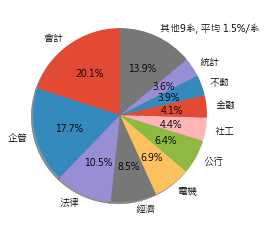

In [13]:
#印出請假排名
leaver = {}
for date in data_json:
    for msg in data_json[date]:
        if is_leave_msg(msg['message']):
            apartment = get_apartment(msg['message'])
            if apartment not in leaver:
                leaver[apartment] = 0
            leaver[apartment] += 1

sorted_leaver = sorted(leaver.items(), key=lambda kv: kv[1], reverse=True)            

draw_x = [v[1] for v in sorted_leaver[:10]]
draw_x.append(sum([v[1] for v in sorted_leaver[10:]]))
draw_y = [v[0] for v in sorted_leaver[:10]]
draw_y.append("其他9系, 平均 %.1f%%/系"%((draw_x[-1]*100/sum(draw_x))/9))

plt.pie(draw_x, labels=draw_y,autopct='%1.1f%%', shadow=True, startangle=90)

for i,v in enumerate(sorted_leaver[:10]): #印出請假前十名
    print("#{:>2} - {}次：{} ".format(i+1,v[1],v[0]))
print("...")